# New York City Taxi Fare Prediction

![](https://i.imgur.com/ecwUY8F.png)

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

This dataset is taken from a [Kaggle competition](ttps://www.kaggle.com/c/new-york-city-taxi-fare-prediction) organized by Google Cloud. It contains over 55 millions rows of training data. We'll attempt to achieve a respectable score in the competition using just a fraction of the data. Along the way, we'll also look at some practical tips for machine learning.






Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online


## 1. Download the Dataset

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install Required Libraries

In [1]:
!pip install numpy pandas  opendatasets xgboost --quiet

In [2]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


### Download Data from Kaggle

We'll use the [opendatasets](https://github.com/JovianML/opendatasets) library to download the dataset. You'll need to upload your [Kaggle API key](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) (a file called `kaggle.json`) to Colab.

In [3]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction"
od.download(dataset_url)




Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: msameersheikh
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:12<00:00, 130MB/s] 



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [4]:
data_dir = './new-york-city-taxi-fare-prediction'


### View Dataset Files

In [5]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Jan 30 07:42 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jan 30 07:42 sample_submission.csv
-rw-r--r-- 1 root root 960K Jan 30 07:42 test.csv
-rw-r--r-- 1 root root 5.4G Jan 30 07:43 train.csv


In [6]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [7]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [8]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [9]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [10]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [11]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.



### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [12]:
import pandas as pd
import random

In [13]:
# Change this
sample_frac = 0.01

In [14]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 1min 25s, sys: 1.53 s, total: 1min 27s
Wall time: 2min 16s


In [15]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


### Load Test Set

For the test set, we'll simply provide the data types.

In [16]:
test_df=pd.read_csv(data_dir+'/test.csv',dtype=dtypes,parse_dates=['pickup_datetime'])

In [17]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [19]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.255058,1.341986
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [20]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0
- `passenger_count` ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.


### Test Set

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [22]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [23]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

### Exploratory Data Analysis and Visualization

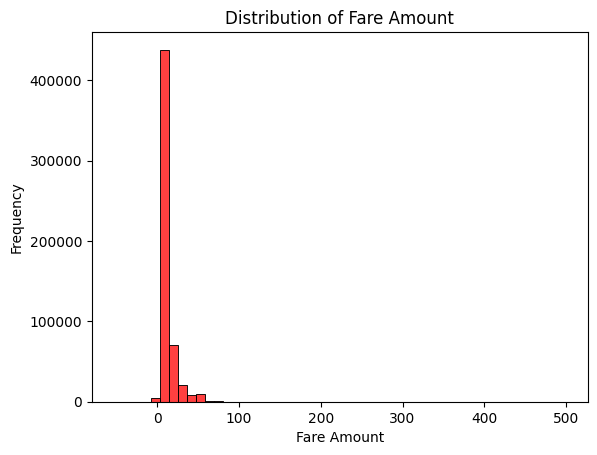

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['fare_amount'], bins=50, color='Red')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

<Axes: xlabel='fare_amount'>

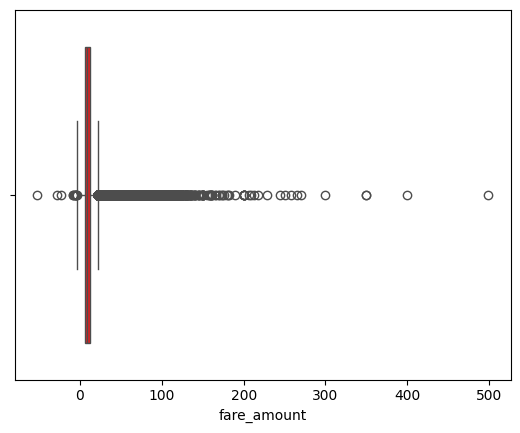

In [25]:
sns.boxplot(x = df['fare_amount'], color = 'red')

In [26]:
def plot_grid(data, fig_size, grid_size, plot_type, target = '',bins=10):
    """
    Custom function for plotting grid of plots.
    It takes: DataFrame of data, size of a grid, type of plots, string name of target variable;
    And it outputs: grid of plots.
    """
    fig = plt.figure(figsize = fig_size)

    if plot_type == 'scatterplot':
        for i, column_name in enumerate(data.drop(target, axis = 1).select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.scatterplot(x = data[column_name], y = data[target], color = 'red')
            plot.set_xlabel(column_name, fontsize = 16)
            plot.set_ylabel(f"{target}")

    plt.tight_layout()

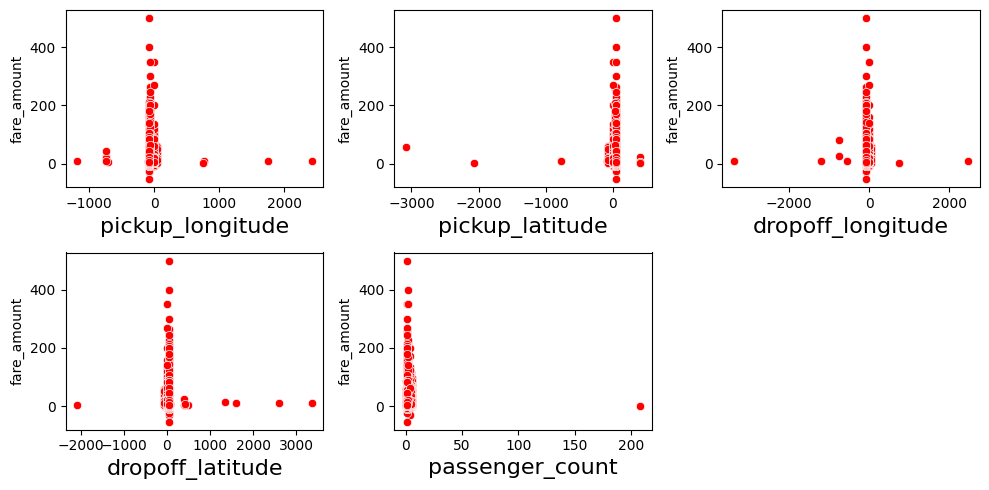

In [27]:
lat_lon=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'passenger_count' , 'fare_amount']

plot_grid(df[lat_lon],fig_size=(10,5), grid_size=(2,3), plot_type='scatterplot', target='fare_amount')

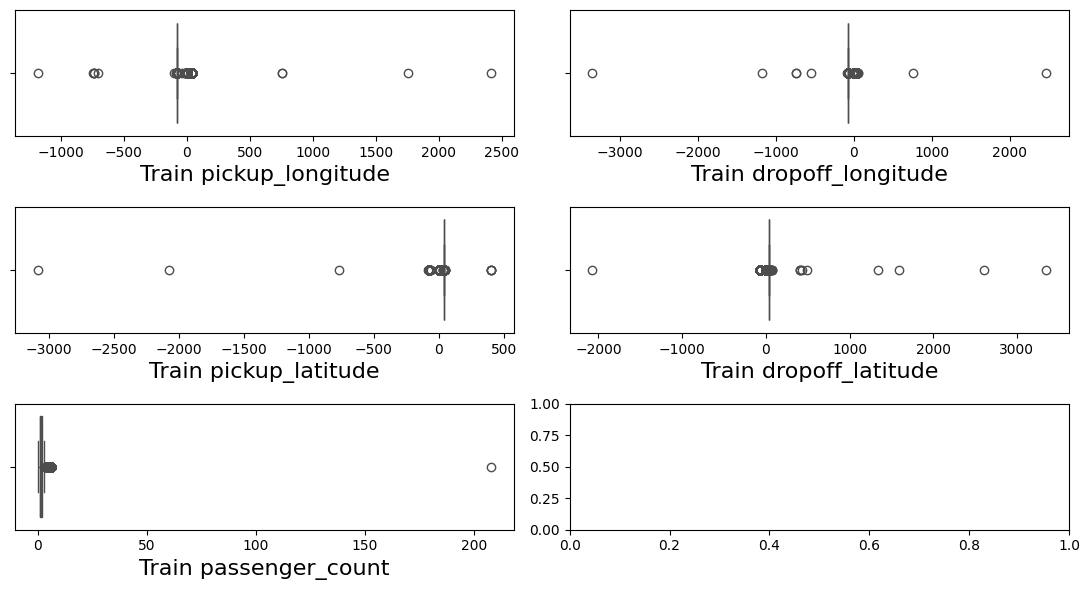

In [28]:
fig, axs = plt.subplots(3, 2, figsize=(11, 6))

p1 = sns.boxplot(x = df['pickup_longitude'], color = 'red', ax=axs[0,0])
p1.set_xlabel('Train pickup_longitude', fontsize = 16)

plot = sns.boxplot(x = df['pickup_latitude'], color = 'red', ax=axs[1,0])
plot.set_xlabel('Train pickup_latitude', fontsize = 16)

plot = sns.boxplot(x = df['dropoff_longitude'], color = 'red', ax=axs[0,1])
plot.set_xlabel('Train dropoff_longitude', fontsize = 16)

plot = sns.boxplot(x = df['dropoff_latitude'], color = 'red', ax=axs[1,1])
plot.set_xlabel('Train dropoff_latitude', fontsize = 16)

plot = sns.boxplot(x = df['passenger_count'], color = 'red', ax=axs[2,0])
plot.set_xlabel('Train passenger_count', fontsize = 16)

plt.tight_layout()


## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.




In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_df,val_df=train_test_split(df,test_size=0.2,random_state=42)

In [31]:
len(train_df),len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [32]:
train_df=train_df.dropna()
val_df=val_df.dropna()



### Extract Inputs and Outputs

In [33]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [34]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [35]:
target_col='fare_amount'

#### Training

In [36]:
train_inputs = train_df[input_cols]

In [37]:
train_targets = train_df[target_col]

In [38]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [39]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


#### Validation

In [40]:
val_inputs = val_df[input_cols]

In [41]:
val_targets = val_df[target_col]

In [42]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [43]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


#### Test

In [44]:
test_inputs = test_df[input_cols]

In [45]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


## 4. Train Hardcoded & Baseline Models

> _**TIP #6**: Always create a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat._

- Hardcoded model: always predict average fare
- Baseline model: Linear regression

For evaluation the dataset uses RMSE error:
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [46]:
import numpy as np

In [47]:
class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()

  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)

In [48]:
mean_model = MeanRegressor()

In [49]:
mean_model.fit(train_inputs, train_targets)

In [50]:
mean_model.mean

11.354714

In [51]:
train_preds = mean_model.predict(train_inputs)

In [52]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [53]:
val_preds = mean_model.predict(val_inputs)

In [54]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
train_rmse = mean_squared_error(train_targets, train_preds,squared=False)
train_rmse

9.789782

In [57]:
val_rmse = mean_squared_error(val_targets, val_preds,squared=False)
val_rmse

9.899954

Our dumb hard-coded model is off by \$9.899 on average, which is pretty bad considering the average fare is \$11.35.

### Train & Evaluate Baseline Model

We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linreg_model = LinearRegression()

In [60]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [61]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [62]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233])

In [63]:
train_rmse = mean_squared_error(train_preds,train_targets,squared=False)
train_rmse

9.78863266989743

In [64]:
val_rmse = mean_squared_error(val_preds,val_targets,squared=False)
val_rmse

9.898088220645102

The linear regression model is off by $9.898, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle



- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [65]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [66]:
test_preds = linreg_model.predict(test_inputs)

In [67]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [68]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [69]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [70]:
generate_submission(test_preds, 'linreg_submission.csv')

## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks


### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [71]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [72]:
add_dateparts(train_df,"pickup_datetime")

In [73]:
add_dateparts(val_df,"pickup_datetime")

In [74]:
add_dateparts(test_df,"pickup_datetime")

In [75]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


### Add Distance Between Pickup and Drop

We can use the haversine distance:
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [76]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


In [77]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [78]:
%%time
add_trip_distance(train_df)

CPU times: user 45.1 ms, sys: 8.6 ms, total: 53.7 ms
Wall time: 63.1 ms


In [79]:
add_trip_distance(val_df)

In [80]:
add_trip_distance(test_df)

In [81]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
50062,7.0,2015-04-29 21:27:29+00:00,-73.975685,40.786671,-73.957443,40.804169,1.0,2015,4,29,2,21,2.476954
407279,13.0,2013-07-13 00:15:43+00:00,-74.002747,40.724968,-73.973679,40.750162,1.0,2013,7,13,5,0,3.718318
442091,7.5,2013-05-22 19:21:00+00:00,40.761600,-73.982880,40.756390,-73.989710,5.0,2013,5,22,2,19,0.775502
421658,5.7,2011-09-24 19:51:00+00:00,-73.990753,40.744862,-73.975975,40.749592,5.0,2011,9,24,5,19,1.350286
238842,6.9,2012-04-27 23:25:00+00:00,-73.969788,40.789803,-73.982285,40.766417,6.0,2012,4,27,4,23,2.803337


### Add Distance From Popular Landmarks



- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location.

In [82]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [83]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [84]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 255 ms, sys: 7.33 ms, total: 262 ms
Wall time: 298 ms


In [85]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
502702,12.5,2011-05-01 13:36:00+00:00,-73.989929,40.740860,-74.017586,40.709408,1.0,2011,5,1,6,13,4.199945,21.556059,14.226387,13.403820,9.025405,0.738073
11682,14.5,2014-10-03 22:44:51+00:00,-73.982735,40.731178,-73.993629,40.762394,1.0,2014,10,3,4,22,3.588291,22.600474,10.196307,17.251917,3.182613,5.700415
293757,6.5,2009-09-09 22:04:35+00:00,-73.970932,40.751434,-73.989952,40.748250,1.0,2009,9,9,2,22,1.639951,21.444156,10.265468,16.859060,4.129199,4.303133
205615,5.0,2014-11-06 15:35:00+00:00,-73.964600,40.771420,-73.968292,40.764860,1.0,2014,11,6,3,15,0.792635,21.101047,8.047329,19.279427,1.671544,6.782343
27425,6.0,2015-02-08 04:05:57+00:00,-73.955719,40.768150,-73.968582,40.754910,1.0,2015,2,8,6,4,1.826606,20.418746,8.326720,18.804404,2.758854,5.849184


### Remove Outliers and Invalid Data

There seems to be some invalid data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [86]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764,193.147978,182.365206,191.412330,177.416092,178.902096
std,9.788187,11.826187,8.449581,12.422503,9.857420,1.341967,1.857024,3.434881,8.697374,1.950033,6.517710,371.299305,1223.614787,1226.672207,1228.515208,1228.388658,1228.487258
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450,20.535191,8.350965,16.502844,2.169888,3.642498
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230,21.202076,9.575570,18.016353,3.818017,5.559662
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673,21.948262,11.122069,19.953306,6.071750,7.814534
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444834,15057.674834,15074.642961,15074.714623,15077.613474,15072.109731


In [87]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042799,0.033542,0.039093,0.035435,1.278756,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [88]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [89]:
train_df= remove_outliers(train_df)

In [90]:
val_df= remove_outliers(val_df)

### Some Questions & Answers

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. What is the average ride distance?

In [91]:
import pandas as pd

# Assuming 'train_df' is your DataFrame and 'pickup_datetime' is the datetime column
# Convert 'pickup_datetime' to datetime objects if it's not already
copy_set = train_df.copy()
# 1. Busiest day of the week
train_df['day_of_week'] = train_df['pickup_datetime'].dt.day_name()
busiest_day = train_df['day_of_week'].mode()[0]
print(f"The busiest day of the week is: {busiest_day}")

# 2. Busiest time of day
train_df['hour_of_day'] = train_df['pickup_datetime'].dt.hour
busiest_hour = train_df['hour_of_day'].mode()[0]
print(f"The busiest hour of the day is: {busiest_hour}")

# 3. Month with highest fares
train_df['month'] = train_df['pickup_datetime'].dt.month
highest_fare_month = train_df.groupby('month')['fare_amount'].mean().idxmax()
print(f"The month with the highest average fares is: {highest_fare_month}")


# 4. Average ride distance
# Assuming you've already calculated 'trip_distance' using haversine
average_distance = train_df['trip_distance'].mean()
print(f"The average ride distance is: {average_distance:.2f} km")

The busiest day of the week is: Friday
The busiest hour of the day is: 19
The month with the highest average fares is: 9
The average ride distance is: 3.33 km


<ipython-input-91-4e69cdb1fd7a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['day_of_week'] = train_df['pickup_datetime'].dt.day_name()
<ipython-input-91-4e69cdb1fd7a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['hour_of_day'] = train_df['pickup_datetime'].dt.hour
<ipython-input-91-4e69cdb1fd7a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.




In [92]:
train_df.to_parquet('train.parquet')

In [93]:
val_df.to_parquet('val.parquet')

In [94]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting



### Split Inputs & Targets

In [95]:
train_df.columns



Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance', 'day_of_week', 'hour_of_day',
       'month'],
      dtype='object')

In [96]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [97]:
target_col = 'fare_amount'

In [98]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [99]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [100]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models.

In [101]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds,squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds,squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [102]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [103]:
from sklearn.linear_model import Ridge

In [104]:
model1 = Ridge(random_state=42)

In [105]:
%%time
model1=model1.fit(train_inputs,train_targets)

CPU times: user 103 ms, sys: 189 ms, total: 292 ms
Wall time: 338 ms


In [106]:
evaluate(model1)

(5.049312855022607,
 5.217863164084474,
 array([ 8.12926895,  4.11625204,  8.75052428, ..., 10.47189549,
         8.23053339, 10.58672574]),
 array([10.91970437,  6.20497332, 46.21797207, ...,  8.04644756,
        25.56873019,  8.45308844]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [107]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081831
1,2015-01-27 13:08:24.0000003,11.399684
2,2011-10-08 11:53:44.0000002,5.356914
3,2012-12-01 21:12:12.0000002,8.763991
4,2012-12-01 21:12:12.0000003,14.610180
...,...,...
9909,2015-05-10 12:37:51.0000002,9.025113
9910,2015-01-12 17:05:51.0000001,11.218273
9911,2015-04-19 20:44:15.0000001,47.926257
9912,2015-01-31 01:05:19.0000005,22.600176


### Random Forest

See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [108]:
from sklearn.ensemble import RandomForestRegressor as RF

In [109]:
model2 = RF(max_depth=10,n_jobs=-1,random_state=42,n_estimators=50)

In [110]:
%%time
model2=model2.fit(train_inputs,train_targets)

CPU times: user 6min 35s, sys: 1.05 s, total: 6min 36s
Wall time: 5min 17s


In [111]:
evaluate(model2)

(3.5979272803236038,
 4.162992374769893,
 array([ 7.04561969,  9.16841263,  9.10837664, ..., 10.38572951,
         7.74169069, 10.38922928]),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33103424,
        29.15652571,  8.2638333 ]))

Our model was able to get to an RMSE of $4.16, much better than our Ridge Regression model.

In [112]:
predict_and_submit(model2, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.507307
1,2015-01-27 13:08:24.0000003,10.507307
2,2011-10-08 11:53:44.0000002,5.052405
3,2012-12-01 21:12:12.0000002,8.466582
4,2012-12-01 21:12:12.0000003,14.344346
...,...,...
9909,2015-05-10 12:37:51.0000002,8.835443
9910,2015-01-12 17:05:51.0000001,12.520002
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.551546



This puts us at position ~570 out of 1483 i.e. top 40%, which is already a really good score.

Remember that we're only using 1% of the data, and we haven't done much hyperparameter tuning yet.

### Gradient Boosting

See https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [113]:
from xgboost import XGBRegressor

In [114]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')


In [115]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 9.8 s, sys: 68.3 ms, total: 9.87 s
Wall time: 6.49 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [116]:
evaluate(model3)

(3.1142666,
 3.9677556,
 array([ 6.2575097,  8.435964 , 10.496409 , ..., 11.761659 ,  9.359157 ,
        10.077442 ], dtype=float32),
 array([14.8424   ,  6.0813756, 48.09645  , ...,  7.7121677, 30.280682 ,
         8.897864 ], dtype=float32))

Our model was able to get to an RMSE of $3.96, little better than our RandomForest model.

In [117]:
predict_and_submit(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.476058
1,2015-01-27 13:08:24.0000003,11.393686
2,2011-10-08 11:53:44.0000002,4.716984
3,2012-12-01 21:12:12.0000002,8.573630
4,2012-12-01 21:12:12.0000003,16.497250
...,...,...
9909,2015-05-10 12:37:51.0000002,9.047094
9910,2015-01-12 17:05:51.0000001,11.033975
9911,2015-04-19 20:44:15.0000001,53.698120
9912,2015-01-31 01:05:19.0000005,19.612867




This submission isn't as good as the random forest, but there's scope for improvement with Hyperparameter tuning.

## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [118]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [119]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: user 2min, sys: 303 ms, total: 2min
Wall time: 1min 36s


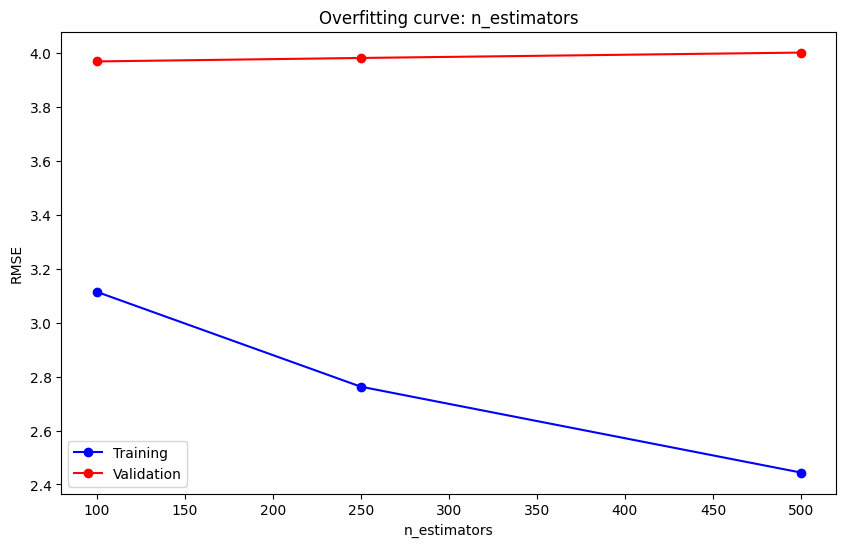

In [120]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 250 estimators has the lowest validation loss.

In [121]:
best_params['n_estimators'] = 250

### Max Depth

CPU times: user 1min 21s, sys: 197 ms, total: 1min 21s
Wall time: 1min 5s


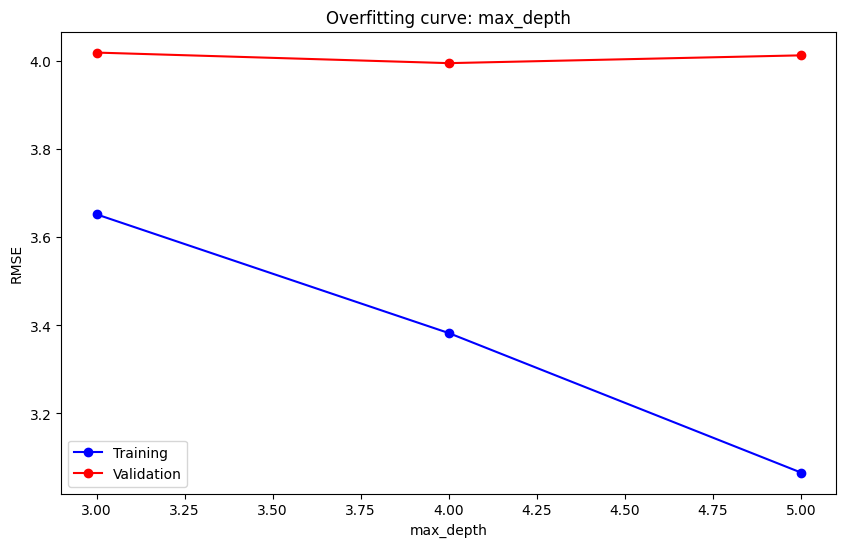

In [122]:
%%time
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

### Learning Rate

CPU times: user 1min 53s, sys: 305 ms, total: 1min 53s
Wall time: 1min 28s


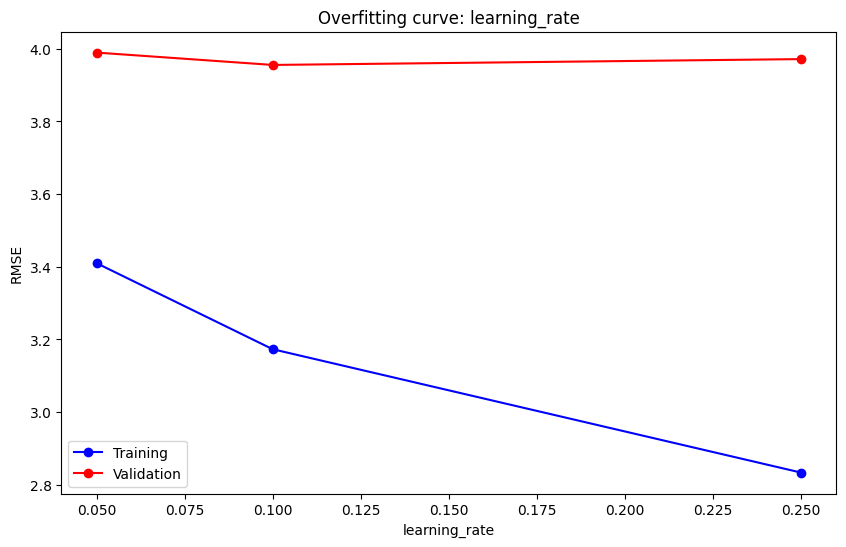

In [123]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [124]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters.

Here's a set of parameters that works well:

In [125]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1,
                               subsample=0.8, colsample_bytree=0.8)

In [126]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 45.3 s, sys: 117 ms, total: 45.5 s
Wall time: 35.1 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [127]:
evaluate(xgb_model_final)

(3.1775746,
 3.9743583,
 array([ 6.40014 ,  7.826713, 10.090213, ..., 11.700136,  9.153927,
        10.020915], dtype=float32),
 array([14.793883 ,  6.1466355, 48.299778 , ...,  7.6731853, 30.364616 ,
         8.587902 ], dtype=float32))

In [128]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.103456
1,2015-01-27 13:08:24.0000003,11.000524
2,2011-10-08 11:53:44.0000002,4.696568
3,2012-12-01 21:12:12.0000002,9.066679
4,2012-12-01 21:12:12.0000003,15.335797
...,...,...
9909,2015-05-10 12:37:51.0000002,8.660035
9910,2015-01-12 17:05:51.0000001,11.641980
9911,2015-04-19 20:44:15.0000001,53.937607
9912,2015-01-31 01:05:19.0000005,19.946941


As we are not getting better performance from Hypertuning here,lets see if we can get the desired results from `RandomizedSearchCV`

### RandomizedSearchCV

Similarly we can get best parameters by using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [250, 500],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 1, 2]
}


random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_iter=100,
    n_jobs=-1
)
random_search.fit(train_inputs,train_targets)
print(random_search.best_params_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [ ]:
xgb_model_final_2 = XGBRegressor(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=0.8,
    gamma=0.2,
    importance_type='gain',
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    missing=np.nan,
    n_estimators=500,
    n_jobs=-1,
    objective='reg:squarederror',
    random_state=42,
    reg_alpha=1,
    reg_lambda=2,
    scale_pos_weight=1,
    subsample=1.0,
    verbosity=1
)



In [ ]:
%%time
xgb_model_final_2.fit(train_inputs, train_targets)

CPU times: user 54.1 s, sys: 107 ms, total: 54.2 s
Wall time: 44.6 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [ ]:
evaluate(xgb_model_final_2)

(2.9806511,
 3.9365046,
 array([ 6.5530167,  8.796769 ,  9.682968 , ..., 12.277252 ,  9.352891 ,
         9.780065 ], dtype=float32),
 array([15.108876,  5.563298, 48.33076 , ...,  7.755488, 30.916922,
         8.794029], dtype=float32))

In [ ]:
predict_and_submit(model3, 'xgb_final_2_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.476058
1,2015-01-27 13:08:24.0000003,11.393686
2,2011-10-08 11:53:44.0000002,4.716984
3,2012-12-01 21:12:12.0000002,8.573630
4,2012-12-01 21:12:12.0000003,16.497250
...,...,...
9909,2015-05-10 12:37:51.0000002,9.047094
9910,2015-01-12 17:05:51.0000001,11.033975
9911,2015-04-19 20:44:15.0000001,53.698120
9912,2015-01-31 01:05:19.0000005,19.612867


Here we got our best model having Val RMSE of 3.93 .You can do more if you want.
